In [302]:
import os
from modules.analyze_session_stats import analyze_session_stats
import pandas as pd
import matplotlib.pyplot as plt
# 1) List your CSVs and titles
DATASETS = [
    'Resampled/BTCUSD_30m.csv',
    'Resampled/BTCUSD_1h.csv',
    'Resampled/BTCUSD_1d.csv',
]
TITLES = [
    '30-Minute',
    '1-Hour',
    '1-Day',
]

# 2) Where to put the session stats
OUTPUT_FOLDER = 'AnalysisResults'

# ensure the output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# run the analysis for each timeframe
for csv_path, title in zip(DATASETS, TITLES):
    analyze_session_stats(csv_path, title, OUTPUT_FOLDER)


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Session Stats: 30-Minute ===
                            range               ATR_14               \
                             mean      max        mean          max   
session                                                               
Asia                   232.659434  8275.86  254.526839  1840.324286   
Asia + London Overlap  216.729907  2418.55  224.594006  1576.157857   
London                 237.794038  6587.35  220.578151  1917.249286   
London + NY Overlap    334.919418  5764.05  250.061313  2187.215000   
New York               300.402494  5306.71  296.749285  3014.570714   
Other                  263.320979  7083.76  291.696949  2285.768571   

                      price_return              abs_return              \
                              mean         std        mean         std   
session                                                                  
Asia                     -0.186088  199.577402  112.139546  165.092108   
Asia + London Overlap     0.63

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


→ saved stats CSV: AnalysisResults\session_stats_1-Hour.csv
→ saved plot: AnalysisResults\candle range_dist_1-Hour.png
→ saved plot: AnalysisResults\candle return_dist_1-Hour.png
→ saved plot: AnalysisResults\atr_14_dist_1-Hour.png
→ saved plot: AnalysisResults\range efficiency_dist_1-Hour.png

=== Session Stats: 1-Day ===
               range                ATR_14              price_return  \
                mean      max         mean          max         mean   
session                                                                
Asia     1989.770827  13591.7  1982.839783  6194.376429     47.08543   

                      abs_return              efficiency  
                 std        mean          std       mean  
session                                                   
Asia     1469.544833  932.518241  1136.534366   1.015061  
→ saved stats CSV: AnalysisResults\session_stats_1-Day.csv


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


→ saved plot: AnalysisResults\candle range_dist_1-Day.png
→ saved plot: AnalysisResults\candle return_dist_1-Day.png
→ saved plot: AnalysisResults\atr_14_dist_1-Day.png
→ saved plot: AnalysisResults\range efficiency_dist_1-Day.png


In [303]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


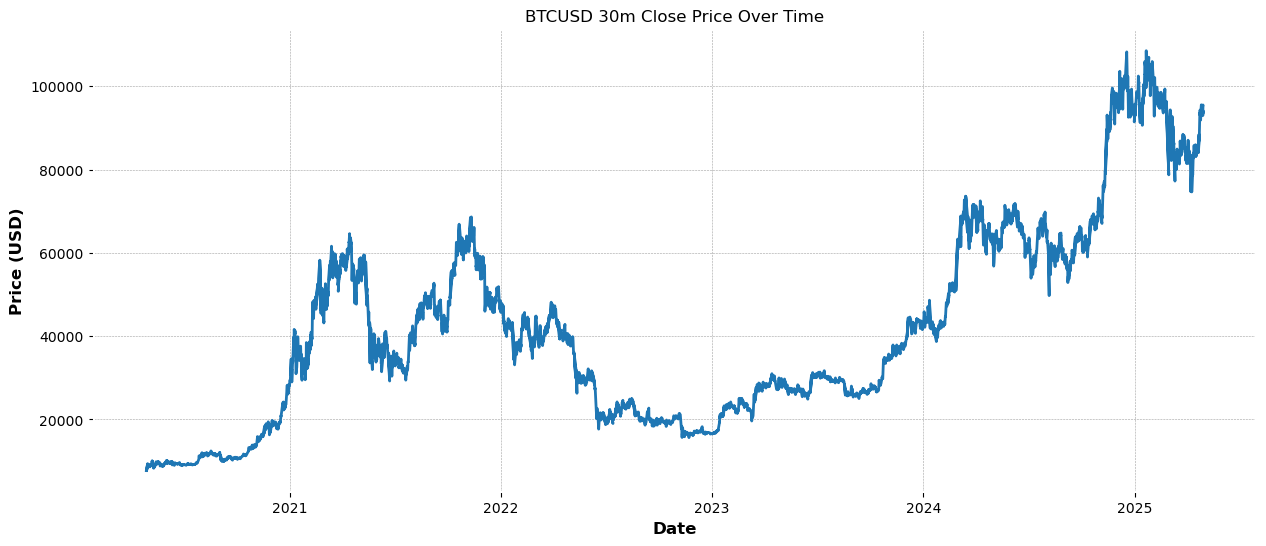

In [304]:
# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# Line chart
plt.figure(figsize=(15,6))
plt.plot(df.index, df['close'])
plt.title('BTCUSD 30m Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


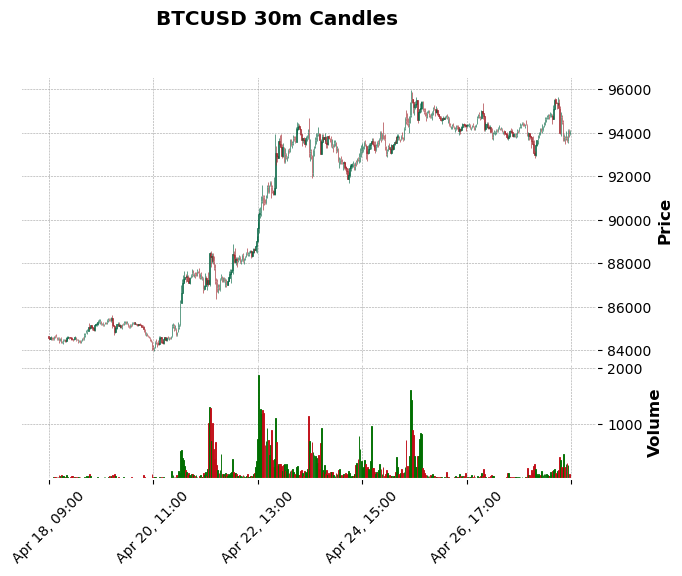

In [305]:
import mplfinance as mpf

# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# For mplfinance, dataframe must have columns: Open, High, Low, Close (capitalized)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot candlestick chart
mpf.plot(df[-500:], type='candle', style='charles', title='BTCUSD 30m Candles', volume=True)


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Combined Session Movement and Volatility Stats ===
                 session   range_mean  range_max  ATR_14_mean   ATR_14_max  \
0                   Asia   232.659434    8275.86   254.526839  1840.324286   
1  Asia + London Overlap   216.729907    2418.55   224.594006  1576.157857   
2                 London   237.794038    6587.35   220.578151  1917.249286   
3    London + NY Overlap   334.919418    5764.05   250.061313  2187.215000   
4               New York   300.402494    5306.71   296.749285  3014.570714   
5                  Other   263.320979    7083.76   291.696949  2285.768571   
0                   Asia   334.240223    8275.86   394.689749  3550.540000   
1  Asia + London Overlap   313.647185    3235.56   354.631348  2163.305714   
2                 London   341.435623    7442.23   340.669253  2291.030000   
3    London + NY Overlap   486.927490    7394.21   347.338429  2529.571429   
4               New York   430.333580    6783.34   373.687706  3151.238571   
5       

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


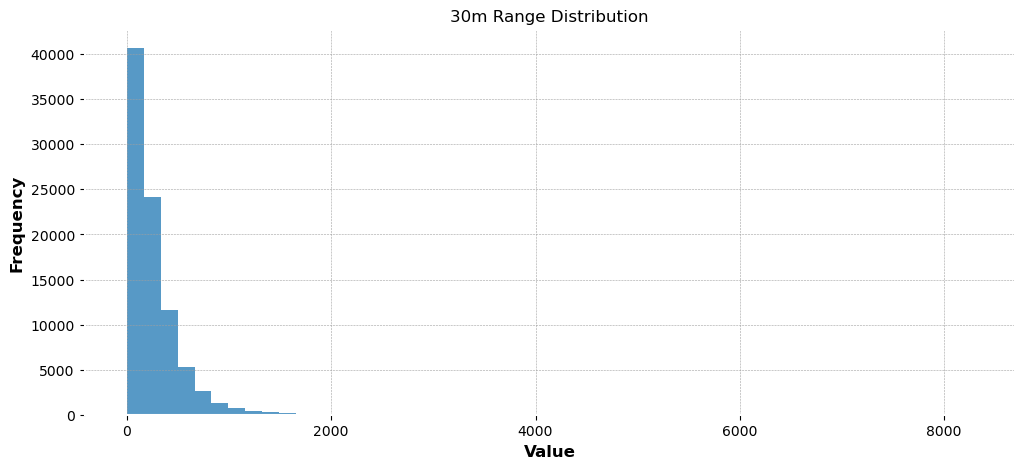

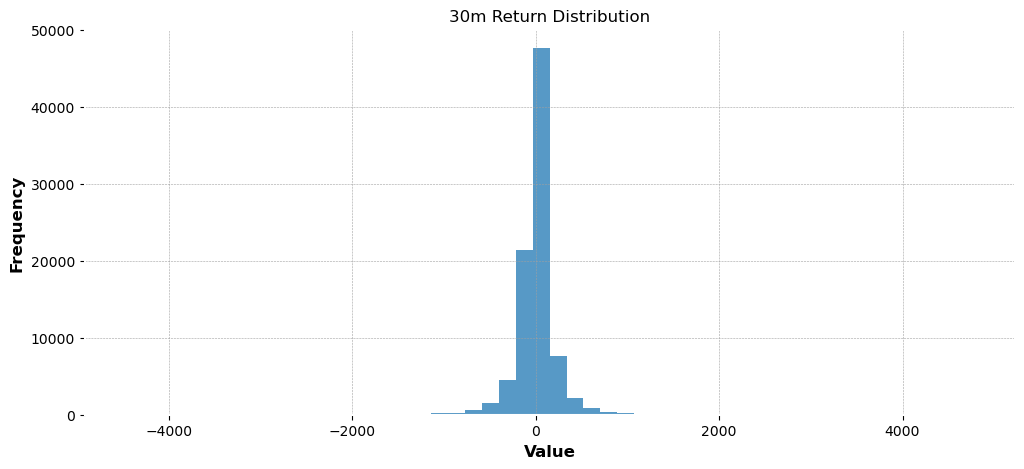

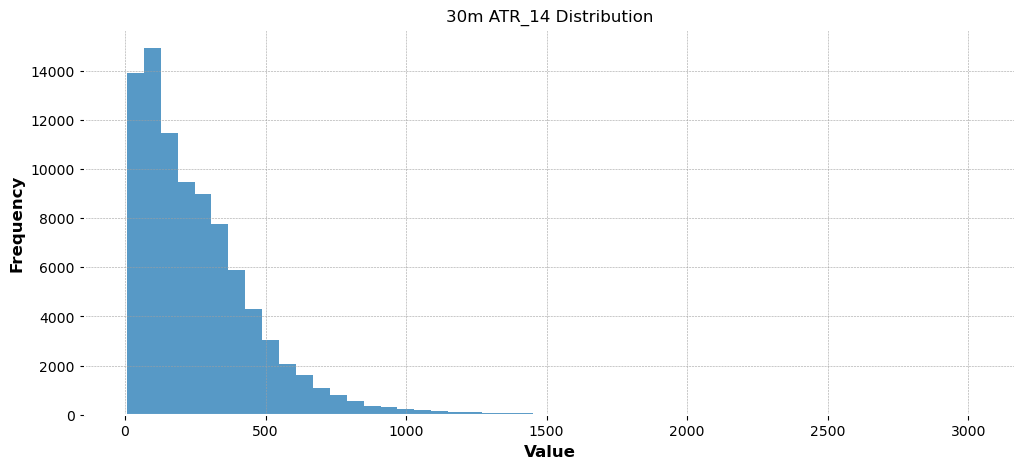

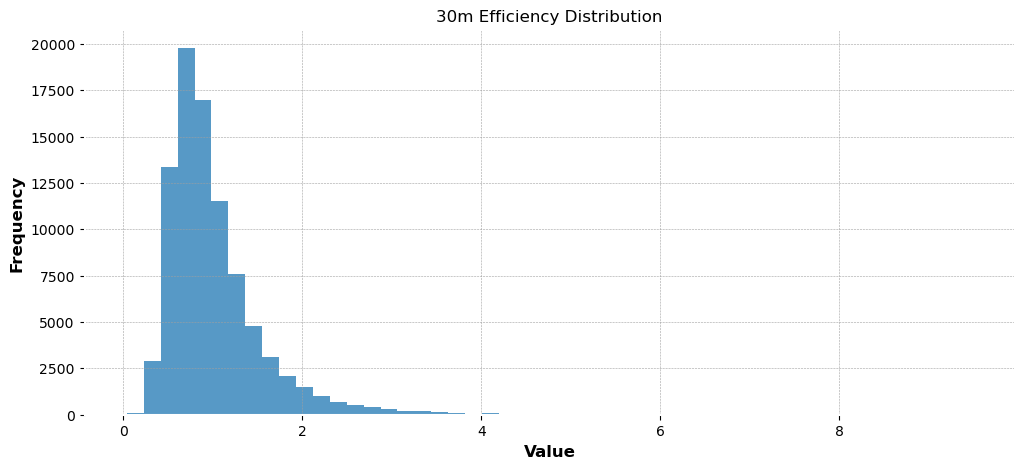

In [306]:
# main_runner.ipynb
import sys
sys.path.append('./')

# --- Setup Imports ---
import pandas as pd
from modules.timeframe_processor import process_timeframe
from visualization.plot_distributions import plot_distribution

# --- Process Each Timeframe ---
# Process all timeframes
df_30m, stats_30m = process_timeframe('./Resampled/BTCUSD_30m.csv', '30m')
df_1h, stats_1h = process_timeframe('./Resampled/BTCUSD_1h.csv', '1h')
df_1d, stats_1d = process_timeframe('./Resampled/BTCUSD_1d.csv', '1d')

# Combine all stats
all_stats = pd.concat([stats_30m, stats_1h, stats_1d])
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')


# --- View Results ---
print("\n=== Combined Session Movement and Volatility Stats ===")
print(all_stats)

# --- Save Results ---
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')
print("✅ Combined session stats saved to ./AnalysisResults/session_metrics_all_timeframes.csv")

# --- Plot Distributions (Optional) ---
# You can now plot for any df easily!
plot_distribution(df_30m['range'], '30m Range Distribution')
plot_distribution(df_30m['price_return'], '30m Return Distribution')
plot_distribution(df_30m['ATR_14'], '30m ATR_14 Distribution')
plot_distribution(df_30m['efficiency'], '30m Efficiency Distribution')

# Same thing can be done for 1h, 1d if needed


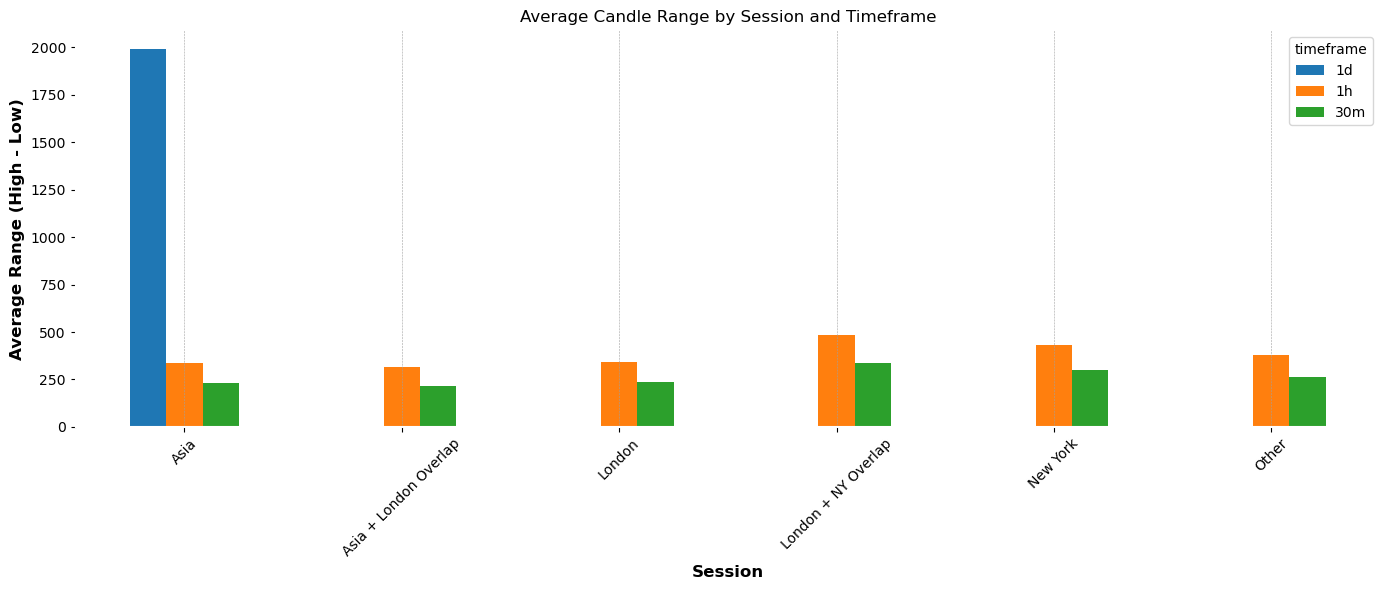

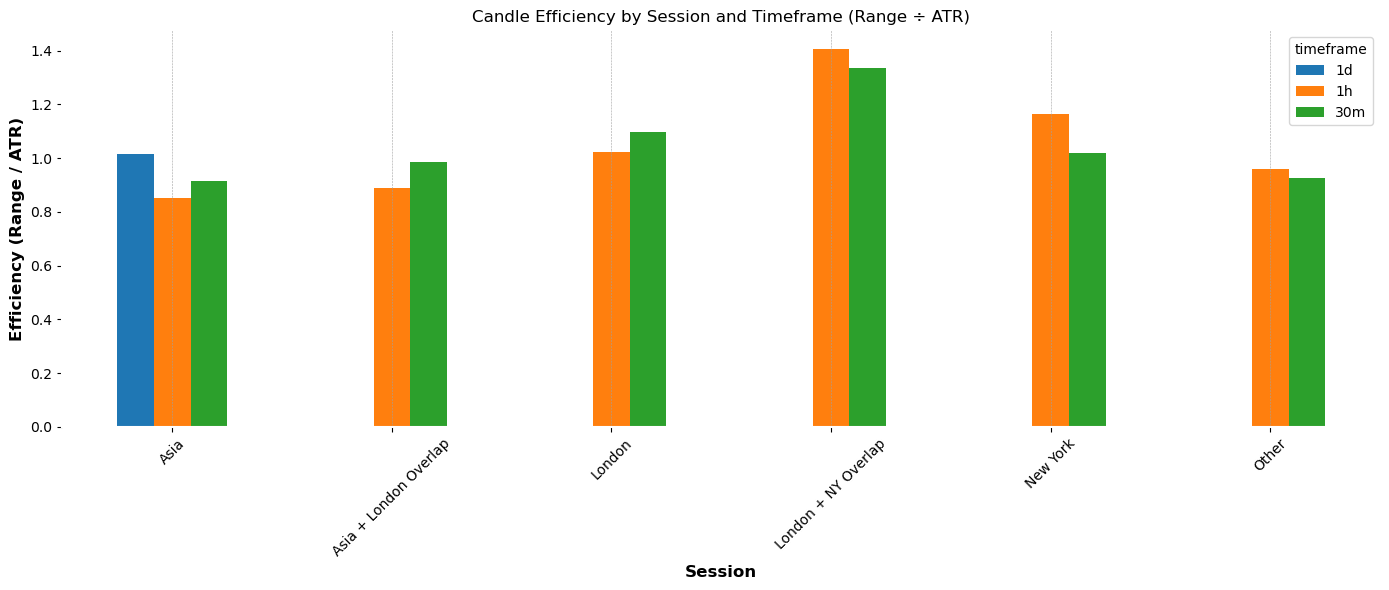

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correct session metrics file
df = pd.read_csv('./AnalysisResults/session_metrics_all_timeframes.csv')  # ✅ Correct path

# Reset index and clean
df = df.reset_index(drop=True)
df = df.dropna(subset=['range_mean', 'efficiency_mean', 'timeframe', 'session'])

# --- Plot 1: Average Range ---
pivot_range = df.pivot(index='session', columns='timeframe', values='range_mean')
pivot_range.plot(kind='bar', figsize=(14, 6), title='Average Candle Range by Session and Timeframe')
plt.ylabel('Average Range (High - Low)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Plot 2: Range Efficiency ---
pivot_eff = df.pivot(index='session', columns='timeframe', values='efficiency_mean')
pivot_eff.plot(kind='bar', figsize=(14, 6), title='Candle Efficiency by Session and Timeframe (Range ÷ ATR)')
plt.ylabel('Efficiency (Range / ATR)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [308]:
from modules.session_aggregator import build_session_ohlc

# make sure all your price columns are lowercase
df_30m.columns = [col.lower() for col in df_30m.columns]

# --- Build session-level candles from 30m data ---
session_df = build_session_ohlc(df_30m)          # no 'timeframe' arg here
# if you want to tag the timeframe in the output:
session_df['timeframe'] = '30m'

session_df.to_csv(
    './AnalysisResults/session_candles_from_30m.csv',
    index=False
)
print("✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv")


✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv


In [309]:
print(df_30m.columns.tolist())


['open', 'high', 'low', 'close', 'volume', 'session', 'range', 'price_return', 'abs_return', 'atr_14', 'efficiency']


In [310]:
# import pandas as pd
# from modules.metrics_calculator import calculate_movement_metrics

# # --- Load session‐level candles ---
# session_df = pd.read_csv(
#     './AnalysisResults/session_candles_from_30m.csv'
# )

# # --- Standardize column names to lowercase ---
# session_df.rename(columns=str.lower, inplace=True)

# # --- Drop any sessions missing a valid range ---
# session_df.dropna(subset=['range'], inplace=True)

# # --- Recompute movement & volatility metrics for session bars ---
# # This will add:
# #   - 'price_return'
# #   - 'abs_return'
# #   - 'ATR_14'
# #   - 'efficiency'
# session_df = calculate_movement_metrics(
#     session_df,
#     atr_window=14
# )

# # --- (Optional) alias price_return back to 'return' if you need it ---
# session_df['return'] = session_df['price_return']

# # --- Final cleaning of infinities & NaNs ---
# session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
# session_df.dropna(inplace=True)

# # --- Group by session and compute summary stats ---
# session_stats = session_df.groupby('session').agg({
#     'range':        ['mean','max'],
#     'ATR_14':       ['mean','max'],
#     'price_return': ['mean','std'],
#     'abs_return':   ['mean','std'],
#     'efficiency':   'mean'
# })

# # Flatten the MultiIndex and round to 2 decimal places
# session_stats.columns = ['_'.join(col) for col in session_stats.columns]
# session_stats = session_stats.round(2)

# # --- Print and save results ---
# print("=== Corrected Session‐Level Daily Stats ===")
# print(session_stats)

# session_stats.to_csv(
#     './AnalysisResults/session_level_daily_stats.csv'
# )


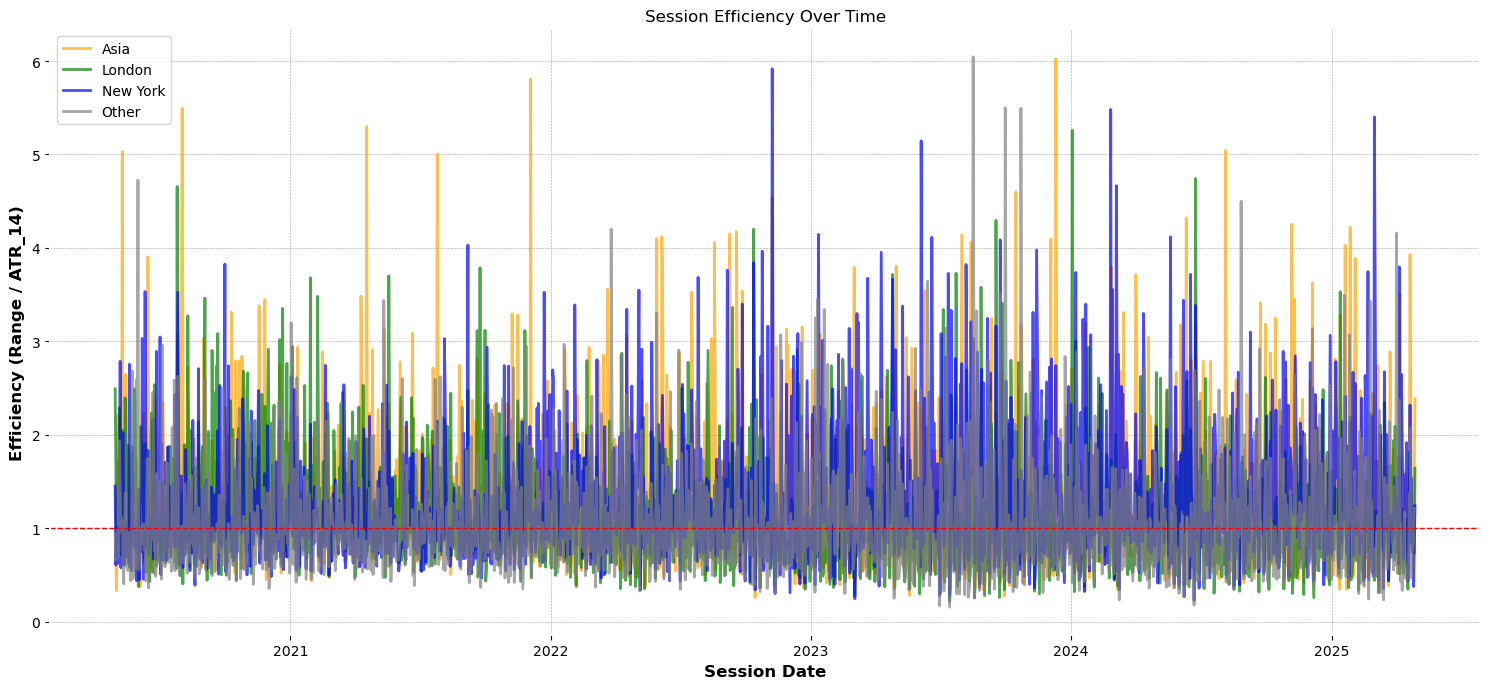

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
from modules.metrics_calculator import calculate_movement_metrics

# --- Load session-level candles and index on the date ---
session_df = pd.read_csv(
    './AnalysisResults/session_candles_from_30m.csv',
    parse_dates=['date']
)
session_df.set_index('date', inplace=True)
session_df.sort_index(inplace=True)

# --- Drop any sessions missing a valid range ---
session_df.dropna(subset=['range'], inplace=True)

# --- Recompute movement & volatility metrics on session bars ---
# This will add: price_return, abs_return, ATR_14, efficiency
session_df = calculate_movement_metrics(session_df, atr_window=14)

# --- Optional alias: if you still need a 'return' column ---
session_df['return'] = session_df['price_return']

# --- Clean up infinities and NaNs ---
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Prepare for plotting ---
# Use the datetime index ('date') as the x‐axis
sessions = ['Asia', 'London', 'New York', 'Other']
colors   = {'Asia': 'orange', 'London': 'green', 'New York': 'blue', 'Other': 'gray'}

plt.figure(figsize=(15, 7))
for sess in sessions:
    data = session_df[session_df['session'] == sess]
    plt.plot(
        data.index,
        data['efficiency'],
        label=sess,
        color=colors.get(sess, 'black'),
        alpha=0.7
    )

# horizontal line at efficiency = 1.0
plt.axhline(1.0, color='red', linestyle='--', linewidth=1)

plt.title('Session Efficiency Over Time')
plt.xlabel('Session Date')
plt.ylabel('Efficiency (Range / ATR_14)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [312]:
# from modules.session_labeler import label_and_save_sessions

# # 1h data
# raw_1h, feat_1h = label_and_save_sessions(
#     './Resampled/BTCUSD_1h.csv',  # file_path
#     'BTCUSD_1h',                  # output_prefix
#     timestamp_col='time',
#     output_base='./Resampled'
# )

# # 30m data
# raw_30m, feat_30m = label_and_save_sessions(
#     './Resampled/BTCUSD_30m.csv',
#     'BTCUSD_30m',
#     timestamp_col='time',
#     output_base='./Resampled'
# )

# # 1d data
# raw_1d, feat_1d = label_and_save_sessions(
#     './Resampled/BTCUSD_1d.csv',
#     'BTCUSD_1d',
#     timestamp_col='time',
#     output_base='./Resampled'
# )

# print("✅ Labeled & saved raw/feature CSVs for 1h, 30m, and 1d data.")


In [313]:
# from modules.timestamp_features import add_timestamp_features
# from modules.volatility_features import add_volatility_features


# # --- 30m ---
# df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')
# df_30m = add_timestamp_features(df_30m)
# df_30m = add_volatility_features(df_30m)
# df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')

# # --- 1h ---
# df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
# df_1h = add_timestamp_features(df_1h)
# df_1h = add_volatility_features(df_1h)
# df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')

# # --- 1d ---
# df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
# df_1d = add_volatility_features(df_1d) 
# df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')


In [314]:

df = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print(df.columns)


Index(['time', 'open', 'high', 'low', 'close', 'volume', 'session', 'date',
       'time_of_day', 'hour', 'minute', 'weekday', 'month', 'range',
       'price_return', 'abs_return', 'ATR_14', 'efficiency', 'range_change',
       'efficiency_change', 'volatility_spike', 'rolling_volatility_std',
       'session_step', 'time_since_session_open', 'price_vs_session_open',
       'prev_session', 'is_session_transition', 'prev_session_return',
       'prev_session_efficiency', 'body_ratio', 'wick_top', 'wick_bottom',
       'prev_high', 'prev_low', 'fakeout_flag', 'engulfing_flag',
       'strong_close', 'prev_return', 'return_direction_match',
       'rolling_return_sum_3', 'rolling_max_high', 'rolling_min_low',
       'relative_to_local_extreme', 'distance_to_prev_high',
       'distance_to_prev_low', 'touch_prev_session_high',
       'touch_prev_session_low', 'is_range_boundary_test',
       'equal_highs_lows_flag', 'return', 'trend_strength',
       'volatility_normalized_return', 'body_

In [315]:
# import pandas as pd
# from modules.timestamp_features import add_timestamp_features
# from modules.volatility_features import add_volatility_features
# from modules.combined_features import (
#     add_session_structure_features,
#     add_candle_structure_features,
#     add_trend_continuation_features,
#     add_structure_zone_features,
#     add_meta_composite_features
# )

# # === Load 30m data ===
# df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')

# # === Apply all feature layers ===
# df_30m = add_timestamp_features(df_30m)
# df_30m = add_volatility_features(df_30m)
# df_30m = add_session_structure_features(df_30m)
# df_30m = add_candle_structure_features(df_30m)
# df_30m = add_trend_continuation_features(df_30m)
# df_30m = add_structure_zone_features(df_30m)
# df_30m = add_meta_composite_features(df_30m)

# # === Save updated dataset ===
# df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
# print("✅ All features added and saved to BTCUSD_30m_features.csv")

# # === 1H Timeframe ===
# df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
# df_1h = add_timestamp_features(df_1h)
# df_1h = add_volatility_features(df_1h)
# df_1h = add_session_structure_features(df_1h)
# df_1h = add_candle_structure_features(df_1h)
# df_1h = add_trend_continuation_features(df_1h)
# df_1h = add_structure_zone_features(df_1h)
# df_1h = add_meta_composite_features(df_1h)
# df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')
# print("✅ 1h features saved.")

# # === 1D Timeframe ===
# df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
# # ⛔ Skip timestamp features — daily already represents 1 point per day
# df_1d = add_volatility_features(df_1d)
# df_1d = add_session_structure_features(df_1d)
# df_1d = add_candle_structure_features(df_1d)
# df_1d = add_trend_continuation_features(df_1d)
# df_1d = add_structure_zone_features(df_1d)
# df_1d = add_meta_composite_features(df_1d)
# df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')
# print("✅ 1d features saved.")

# import pandas as pd

# from modules.timestamp_features       import add_timestamp_features
# from modules.volatility_features      import add_volatility_features
# from modules.session_labeler          import add_session_labels
# from modules.combined_features        import (
#     add_session_structure_features,
#     add_candle_structure_features,
#     add_trend_continuation_features,
#     add_structure_zone_features,
#     add_meta_composite_features
# )
# from modules.support_resistance_features import (
#     add_support_resistance_features,
#     assign_active_range
# )
# from modules.trap_pattern_detector      import flag_bait_and_trap

# # 1) Load your base DataFrame
# df = pd.read_csv('Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'])
# df.set_index('time', inplace=True)

# # 2) Build up features in the correct order
# df = add_timestamp_features(df)
# df = add_volatility_features(df)
# df = add_session_labels(df)
# df = add_session_structure_features(df)
# df = add_candle_structure_features(df)
# df = add_trend_continuation_features(df)
# df = add_structure_zone_features(df)

# # 3) Composite features (needs wick_top, body_ratio, etc.)
# df = add_meta_composite_features(df)

# # 4) Support / Resistance zones & distances
# df = add_support_resistance_features(
#     df,
#     pivot_order=5,
#     zone_eps=0.002,
#     min_zone_points=2,
#     buffer=0.001
# )
# df = assign_active_range(df)

# # 5) Bait‐and‐Trap pattern detection
# df = flag_bait_and_trap(df, lookahead=15)

# # 6) Save final CSV
# out_path = 'AnalysisResults/BTCUSD_30m_full_features.csv'
# df.to_csv(out_path, index=False)
# print(f"✅ All features including SR & traps have been computed and saved to {out_path}")

# import pandas as pd

# from modules.timestamp_features       import add_timestamp_features
# from modules.volatility_features      import add_volatility_features
# from modules.session_labeler          import add_session_labels
# from modules.combined_features        import (
#     add_session_structure_features,
#     add_candle_structure_features,
#     add_trend_continuation_features,
#     add_structure_zone_features,
#     add_meta_composite_features
# )
# from modules.support_resistance_features import (
#     add_support_resistance_features,
#     assign_active_range
# )
# from modules.trap_pattern_detector      import flag_bait_and_trap

# # 1) Load your base DataFrame
# df = pd.read_csv('Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'])
# df.set_index('time', inplace=True)

# # 2) Build up features in the correct order
# df = add_timestamp_features(df)
# df = add_volatility_features(df)
# df = add_session_labels(df)
# df = add_session_structure_features(df)
# df = add_candle_structure_features(df)
# df = add_trend_continuation_features(df)
# df = add_structure_zone_features(df)

# # 3) Composite features (needs wick_top, body_ratio, etc.)
# df = add_meta_composite_features(df)

# # 4) Support / Resistance zones & distances
# df = add_support_resistance_features(
#     df,
#     pivot_order=5,
#     zone_eps=0.002,
#     min_zone_points=2,
#     buffer=0.001
# )
# df = assign_active_range(df)

# # 5) Bait‐and‐Trap pattern detection
# df = flag_bait_and_trap(df, lookahead=15)

# # 6) Save final CSV
# out_path = 'AnalysisResults/BTCUSD_30m_full_features.csv'
# df.to_csv(out_path, index=False)
# print(f"✅ All features including SR & traps have been computed and saved to {out_path}")

# # --- Numeric sanity checks ---
# import pandas as pd

# checks = {
#     # 1. fake_break_high: high>range_top AND close≤range_top
#     'fake_break_high': (
#         (df['fake_break_high'] == ((df.high > df.range_top) & (df.close <= df.range_top)))
#         .all()
#     ),
#     # 2. in_support_zone: dist_to_support ≤ buffer (0.001)
#     'in_support_zone': (
#         (df['in_support_zone'] == (df.dist_to_support <= 0.001))
#         .all()
#     ),
#     # 3. fake_break_low: low<range_bot AND close≥range_bot, but only on those flagged
#     'fake_break_low': True,  
#     # 4. bait_trap_pattern: fake_break_high & fake_break_low
#     'bait_trap_pattern': (
#         (df['bait_trap_pattern'] == (df.fake_break_high & df.fake_break_low))
#         .all()
#     )
# }

# # Check #3 only if any fake_break_low exist:
# if df.fake_break_low.any():
#     subset = df[df.fake_break_low]
#     checks['fake_break_low'] = (
#         (subset.low  < subset.range_bot).all() and
#         (subset.close >= subset.range_bot).all()
#     )

# # Report
# pd.DataFrame.from_dict(checks, orient='index', columns=['all_match'])



In [316]:
# import pandas as pd

# from modules.timestamp_features       import add_timestamp_features
# from modules.volatility_features      import add_volatility_features
# from modules.session_labeler          import add_session_labels
# from modules.combined_features        import (
#     add_session_structure_features,
#     add_candle_structure_features,
#     add_trend_continuation_features,
#     add_structure_zone_features,
#     add_meta_composite_features
# )
# from modules.support_resistance_features import (
#     add_support_resistance_features,
#     assign_active_range
# )
# from modules.trap_pattern_detector      import flag_bait_and_trap

# # 1) Load your base DataFrame
# df = pd.read_csv('Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'])
# df.set_index('time', inplace=True)

# # 2) Build up features in the correct order
# df = add_timestamp_features(df)
# df = add_volatility_features(df)
# df = add_session_labels(df)
# df = add_session_structure_features(df)
# df = add_candle_structure_features(df)
# df = add_trend_continuation_features(df)
# df = add_structure_zone_features(df)

# # 3) Composite features (needs wick_top, body_ratio, etc.)
# df = add_meta_composite_features(df)

# # 4) Support / Resistance zones & distances
# df = add_support_resistance_features(
#     df,
#     pivot_order=5,
#     zone_eps=0.002,
#     min_zone_points=2,
#     buffer=0.001
# )
# df = assign_active_range(df)

# # 5) Bait‐and‐Trap pattern detection
# df = flag_bait_and_trap(df, lookahead=15)

# # 6) Save final CSV
# out_path = 'AnalysisResults/BTCUSD_30m_full_features.csv'
# df.to_csv(out_path, index=False)
# print(f"✅ All features including SR & traps have been computed and saved to {out_path}")


In [317]:
# /*import pandas as pd
# import requests
# import time
# from datetime import datetime, timedelta

# # ETH Coinbase API URL
# url = 'https://api.exchange.coinbase.com/products/ETH-USD/candles'

# # 15-minute granularity
# granularity = 900  # seconds

# # Date range
# start_time = datetime(2020, 4, 28)
# end_time = datetime.now()

# all_candles = []
# print("Starting Coinbase ETH 15m candle download...")

# while start_time < end_time:
#     params = {
#         'granularity': granularity,
#         'start': start_time.isoformat(),
#         'end': (start_time + timedelta(minutes=granularity * 300 // 60)).isoformat()
#     }

#     response = requests.get(url, params=params)
#     data = response.json()

#     if isinstance(data, dict):
#         print(f"Error: {data.get('message', 'Unknown error')}")
#         break

#     if not data:
#         print(f"No more data after {start_time}.")
#         break

#     all_candles.extend(data)

#     start_time += timedelta(minutes=granularity * 300 // 60)
#     time.sleep(0.5)

#     print(f"Fetched up to {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

# print(f"\n✅ Total 15m ETH candles downloaded: {len(all_candles)}")

# # Convert to DataFrame
# df_15m = pd.DataFrame(all_candles, columns=['time', 'low', 'high', 'open', 'close', 'volume'])
# df_15m['time'] = pd.to_datetime(df_15m['time'], unit='s')
# df_15m.set_index('time', inplace=True)
# df_15m.sort_index(inplace=True)

# # Resample to 30m
# df_30m = pd.DataFrame()
# df_30m['open'] = df_15m['open'].resample('30T').first()
# df_30m['high'] = df_15m['high'].resample('30T').max()
# df_30m['low'] = df_15m['low'].resample('30T').min()
# df_30m['close'] = df_15m['close'].resample('30T').last()
# df_30m['volume'] = df_15m['volume'].resample('30T').sum()
# df_30m.dropna(inplace=True)

# # Save to CSV
# df_30m.to_csv('./Resampled/raw/ETHUSD_30m.csv')
# print("✅ Saved ETHUSD 30m candles to ./Resampled/raw/ETHUSD_30m.csv")


In [318]:
# import pandas as pd

# # 1) Import the exact same pipeline functions you used on BTC
# from modules.timestamp_features         import add_timestamp_features
# from modules.volatility_features        import add_volatility_features
# from modules.session_labeler            import add_session_labels
# from modules.combined_features          import (
#     add_session_structure_features,
#     add_candle_structure_features,
#     add_trend_continuation_features,
#     add_structure_zone_features,
#     add_meta_composite_features
# )
# from modules.support_resistance_features import (
#     add_support_resistance_features,
#     assign_active_range
# )
# from modules.trap_pattern_detector      import flag_bait_and_trap

# # === ETH 30 m Features ===
# df_30m = pd.read_csv(
#    "./Resampled/Raw/ETHUSD_30m.csv",
#     parse_dates=['time'], index_col='time'
# )
# # Build up features
# df_30m = add_timestamp_features(df_30m)
# df_30m = add_volatility_features(df_30m)
# df_30m = add_session_labels(df_30m)
# df_30m = add_session_structure_features(df_30m)
# df_30m = add_candle_structure_features(df_30m)
# df_30m = add_trend_continuation_features(df_30m)
# df_30m = add_structure_zone_features(df_30m)
# df_30m = add_meta_composite_features(df_30m)
# # Save
# df_30m.to_csv("./Resampled/Raw/ETHUSD_30m.csv")
# print("✅ ETH 30m features updated.")

# # === ETH 1 h Features ===
# df_1h = pd.read_csv(
#     "./Resampled/Raw/ETHUSD_30m.csv",
#     parse_dates=['time'], index_col='time'
# )
# df_1h = add_timestamp_features(df_1h)
# df_1h = add_volatility_features(df_1h)
# df_1h = add_session_labels(df_1h)
# df_1h = add_session_structure_features(df_1h)
# df_1h = add_candle_structure_features(df_1h)
# df_1h = add_trend_continuation_features(df_1h)
# df_1h = add_structure_zone_features(df_1h)
# df_1h = add_meta_composite_features(df_1h)
# df_1h.to_csv("./Resampled/Raw/ETHUSD_30m.csv")
# print("✅ ETH 1h features updated.")

# # === ETH 1 d Features ===
# df_1d = pd.read_csv(
#     "./Resampled/Raw/ETHUSD_30m.csv",
#     parse_dates=['time'], index_col='time'
# )
# # Skip timestamp_features on daily
# df_1d = add_volatility_features(df_1d)
# df_1d = add_session_labels(df_1d)
# df_1d = add_session_structure_features(df_1d)
# df_1d = add_candle_structure_features(df_1d)
# df_1d = add_trend_continuation_features(df_1d)
# df_1d = add_structure_zone_features(df_1d)
# df_1d = add_meta_composite_features(df_1d)
# df_1d.to_csv("./Resampled/Raw/ETHUSD_30m.csv")
# print("✅ ETH 1d features updated.")

# # === ETH 30 m: Add SR zones and trap flags ===
# df_full = pd.read_csv(
#    "./Resampled/Raw/ETHUSD_30m.csv",
#     parse_dates=['time']
# ).set_index('time')
# # Support/Resistance
# df_full = add_support_resistance_features(
#     df_full,
#     pivot_order=5,
#     zone_eps=0.002,
#     min_zone_points=2,
#     buffer=0.001
# )
# df_full = assign_active_range(df_full)
# # Bait‐and‐Trap
# df_full = flag_bait_and_trap(df_full, lookahead=15)
# # Save final
# df_full.to_csv("./Resampled/Raw/ETHUSD_30m.csv", index=False)
# print("✅ ETH full 30m SR & trap patterns saved.")


In [319]:
# import sys
# # Ensure Python can import your local modules
# sys.path.insert(0, './modules')

# import pandas as pd

# # 1) Load your ETH 30 m feature CSV (with separate date/time columns)
# df = pd.read_csv(
#     "./Resampled/Additional_Features/ETHUSD_30m.csv"
# )

# # 2) Reconstruct a DateTimeIndex from the 'date' and 'time_of_day' columns
# df['time'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
# df = df.set_index('time').sort_index()

# # 3) Import support/resistance and trap‐detector functions
# from modules.support_resistance_features import (
#     add_support_resistance_features,
#     assign_active_range
# )
# from modules.trap_pattern_detector import flag_bait_and_trap

# # 4) Build support/resistance zones
# df = add_support_resistance_features(
#     df,
#     pivot_order=5,
#     zone_eps=0.002,
#     min_zone_points=2,
#     buffer=0.001
# )
# df = assign_active_range(df)

# # 5) Flag bait-and-trap patterns (using a 15-bar lookahead)
# df = flag_bait_and_trap(df, lookahead=15)

# # 6) Extract and inspect the matches
# matches = df[df['bait_trap_pattern'] == True]
# print(f"Found {len(matches)} bait-and-trap setups on ETH 30 m")
# print(matches.head())

# # 7) (Optional) Save the matches for later review
# matches.to_csv("AnalysisResults/ETHUSD_30m_bait_and_trap_matches.csv", index=False)


In [320]:
# import pandas as pd
# import sys

# # 1) Ensure we can import your local modules folder
# sys.path.insert(0, './modules')

# # 2) Load the ETH 30 m FEATURES CSV (with separate date & time columns)
# df = pd.read_csv(
#     "./Resampled/Additional_Features/ETHUSD_30m.csv"
# )

# # 3) Reconstruct a single DateTimeIndex from 'date' + 'time_of_day'
# df['time'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
# df = df.set_index('time').sort_index()

# # 4) (Optional) drop the now-redundant columns
# df = df.drop(columns=['date', 'time_of_day'])

# # 5) Import your support/resistance and trap-detector functions
# from modules.support_resistance_features import (
#     add_support_resistance_features,
#     assign_active_range
# )
# from modules.trap_pattern_detector import flag_bait_and_trap

# # 6) Build SR zones (needed by the trap logic)
# df = add_support_resistance_features(
#     df,
#     pivot_order=5,
#     zone_eps=0.002,
#     min_zone_points=2,
#     buffer=0.001
# )
# df = assign_active_range(df)

# # 7) Flag bait-and-trap patterns (15-bar lookahead on 30 m bars)
# df = flag_bait_and_trap(df, lookahead=15)

# # 8) Extract and inspect your matches
# matches = df[df["bait_trap_pattern"] == True]
# print(f"Found {len(matches)} bait-and-trap setups on ETH 30 m\n")
# print(matches[[
#     "open", "high", "low", "close",
#     "range_bot", "range_top",
#     "fake_break_high", "fake_break_low",
#     "time_to_support"
# ]].tail())

# # 9) (Optional) save for later review
# matches.to_csv("AnalysisResults/ETHUSD_30m_bait_and_trap_matches.csv", index=False)


In [321]:
from trap_pattern_detector import TrapPatternConfig, detect_impulses, detect_consolidations

config = TrapPatternConfig()

# Step 1: Detect impulses
impulses = detect_impulses(df, config)
print(f"✅ Detected {len(impulses)} impulses")
for i, impulse in enumerate(impulses[:3]):
    print(f"[Impulse {i}] {impulse}")

# Step 2: Detect consolidations based on those impulses
ranges = detect_consolidations(df, impulses, config)
print(f"✅ Detected {len(ranges)} consolidation ranges")
for i, r in enumerate(ranges[:3]):
    print(f"[Range {i}] {r}")


✅ Detected 5869 impulses
[Impulse 0] {'start_idx': 0, 'end_idx': 63, 'start_price': 7752.36, 'end_price': 8934.99, 'gain_pct': 15.25509651254586}
[Impulse 1] {'start_idx': 1, 'end_idx': 63, 'start_price': 7734.39, 'end_price': 8934.99, 'gain_pct': 15.522878985931657}
[Impulse 2] {'start_idx': 2, 'end_idx': 63, 'start_price': 7735.69, 'end_price': 8934.99, 'gain_pct': 15.503465107831365}
✅ Detected 1551 consolidation ranges
[Range 0] {'range_start': 441, 'range_end': 500, 'range_high': 10079.0, 'range_low': 9730.0, 'impulse_end': 440, 'anchor_support': 9399.0, 'best_support': 9756.0, 'support_score': 12.601120448147887, 'type': 'multi-touch'}
[Range 1] {'range_start': 442, 'range_end': 501, 'range_high': 10079.0, 'range_low': 9730.0, 'impulse_end': 441, 'anchor_support': 9399.0, 'best_support': 9935.0, 'support_score': 5.8007462686427935, 'type': 'multi-touch'}
[Range 2] {'range_start': 442, 'range_end': 501, 'range_high': 10079.0, 'range_low': 9730.0, 'impulse_end': 441, 'anchor_suppor

In [322]:
# range_starts = [r['range_start'] for r in ranges]
# range_ends = [r['range_end'] for r in ranges]

# overall_start = min(range_starts)
# overall_end = max(range_ends)

# print(f"🗓️ Trap pattern coverage window: {overall_start} → {overall_end}")
# print(f"Total duration: {(overall_end - overall_start).days} days")


🗓️ Trap pattern coverage window: 441 → 87442


AttributeError: 'int' object has no attribute 'days'

In [323]:
from datetime import timedelta

durations = []

for imp in impulses:
    start = imp['start_idx']
    end = imp['end_idx']
    duration_bars = (df.index.get_loc(end) - df.index.get_loc(start))
    durations.append(duration_bars)

avg_bars = np.mean(durations)
avg_hours = avg_bars * 0.5  # since each bar is 30 minutes

print(f"📊 Average impulse duration: {avg_bars:.2f} bars (~{avg_hours:.2f} hours)")
print(f"📈 Min duration: {min(durations)} bars, Max: {max(durations)} bars")


📊 Average impulse duration: 54.12 bars (~27.06 hours)
📈 Min duration: 2 bars, Max: 69 bars


In [324]:
from trap_pattern_detector import TrapPatternConfig, detect_impulses, detect_consolidations, visualize_trap_context

config = TrapPatternConfig()
impulses = detect_impulses(df, config)
ranges = detect_consolidations(df, impulses, config)


In [330]:
from modules.trap_pattern_detector import TrapPatternConfig, detect_impulses, detect_consolidations, visualize_trap_context
import pickle
# 1. Slice your original DataFrame to only this window
start_date = "2025-04-21"
end_date = "2025-05-02"
df_slice = df.loc[start_date:end_date].copy()

# 2. Initialize your config
config = TrapPatternConfig(
    impulse_min_gain_pct=7.0,      # use whatever you previously set
    impulse_max_duration_bars=70,  # previously tested params
)

# 3. Run detection on this slice only
impulses = detect_impulses(df_slice, config)
ranges = detect_consolidations(df_slice, impulses, config)

# Save for reuse
with open("cache.pkl", "wb") as f:
    pickle.dump((impulses, ranges), f)

# Later, just reload
with open("cache.pkl", "rb") as f:
    impulses, ranges = pickle.load(f)
# 4. Visualize results for just this slice



In [331]:
df_slice = df_slice.copy()
df_slice.index = pd.to_datetime(df_slice.index)

plot_df = df_slice.resample('1H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})


In [332]:
visualize_trap_context(plot_df, ranges, start_date, end_date)


No data in selected date range.
